<a href="https://colab.research.google.com/github/terrysu64/Machine-Learning-and-Data-Science-Projects/blob/main/convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional neural networks + computer vision

In [4]:
#get data

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-26 00:02:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M   285MB/s    in 0.4s    

2022-07-26 00:02:23 (285 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



### inspect data

In [5]:
!ls pizza_steak

test  train


In [6]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(dirpath, len(dirnames), len(filenames))

pizza_steak 2 0
pizza_steak/train 2 0
pizza_steak/train/pizza 0 750
pizza_steak/train/steak 0 750
pizza_steak/test 2 0
pizza_steak/test/pizza 0 250
pizza_steak/test/steak 0 250


In [7]:
#get classnames
import pathlib 
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

(512, 512, 3)


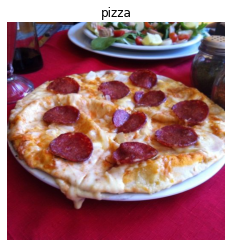

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import random

def view_rand_img(target_dir, target_class):
  folder = target_dir+target_class
  rand_img = random.sample(os.listdir(folder), 1)
  img = mpimg.imread(folder + "/" + rand_img[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(img.shape)

  return img

img=view_rand_img("pizza_steak/train/", "pizza")

In [16]:
img.shape

(512, 512, 3)

In [15]:
import tensorflow as tf